<a href="https://colab.research.google.com/github/vks2268/Yes_Bank_Stock_Closing_price_Prediction/blob/main/Yes_Bank_stock_closing_price_prediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**:- **Yes Bank Stocks Closing Price Predication**

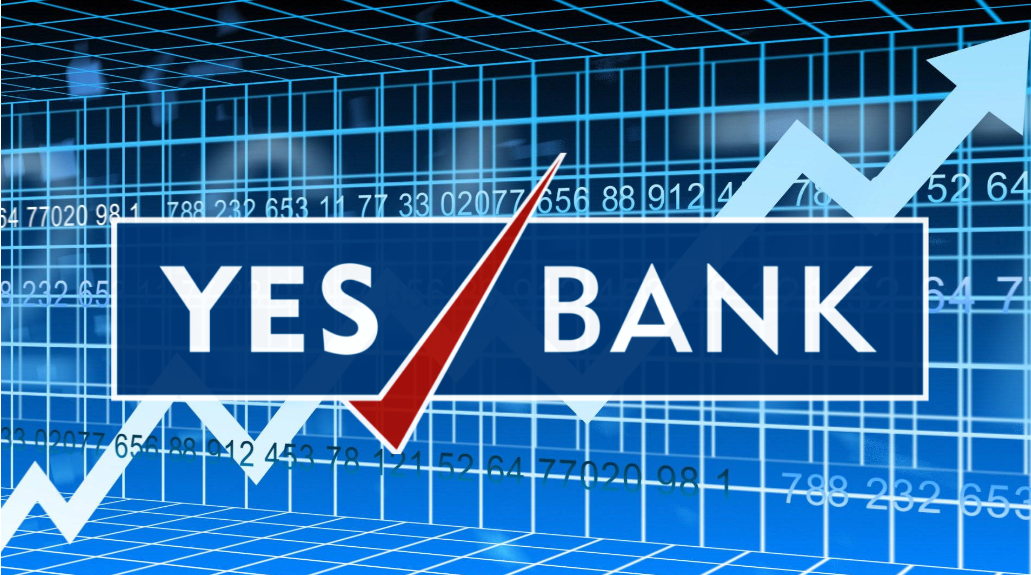

##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -**  Vikas Kumar
##### **Team Member 2 -** Kuldeep Singh
##### **Team Member 3 -** Brajesh Patel

# **Project Summary -**

This project is done by the our team member Vikas Kumar, Kuldeep Singh, Brajesh Patel.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/vks2268/Yes_Bank_Stock_Closing_price_Prediction

# **Problem Statement**


**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
!pip install lime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=09fe1c57cacfebd079001c99b1098ae4c2be12fa15266b02a9d2c061a3a37fd6
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
bank_dataset = pd.read_csv("/content/drive/MyDrive/Capstone project 2_Regression/data_YesBank_StockPrices.csv")

### Dataset First View

In [4]:
# Dataset First Look
bank_dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
bank_dataset.shape

(185, 5)

### Here in this dataset we got the 185 rows and 5 columns



### **Dataset Information**

In [6]:
# Dataset Info
bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [7]:
bank_dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


## Here statistical details of dataset and only include the numerical values of dataset.

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
bank_dataset.duplicated().sum()

0

In [9]:
len(bank_dataset[bank_dataset.duplicated()])

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
bank_dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

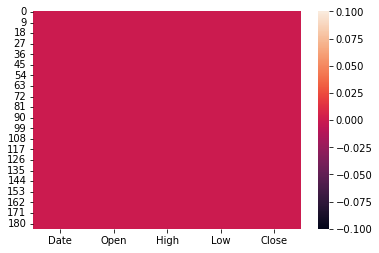

In [11]:
# Visualizing the missing values
sns.heatmap(bank_dataset.isnull())   

### What did you know about your dataset?


We were able to determine from the provided dataset that there are a total of 5 columns, 185 rows, 4 columns of data type float, and 1 column of data type Object.

There are not any mising values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
bank_dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [13]:
# Dataset Describe
bank_dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [14]:
bank_dataset.describe(include = 'all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


### Variables Description 

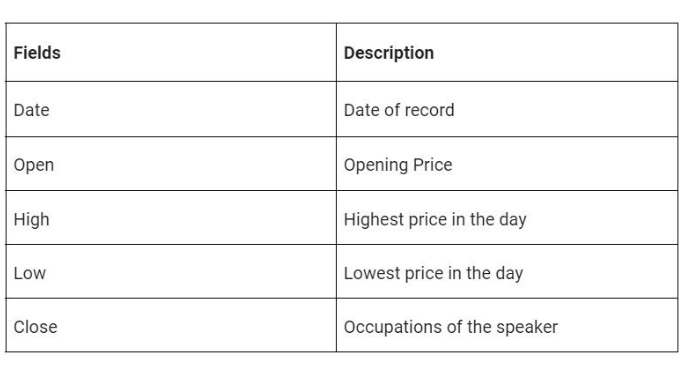

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
for i in bank_dataset.columns.tolist():
  unique_val = bank_dataset[i].nunique()
  print("Number of unique values in ",i,"is",unique_val)

Number of unique values in  Date is 185
Number of unique values in  Open is 183
Number of unique values in  High is 184
Number of unique values in  Low is 183
Number of unique values in  Close is 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
bank_dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [17]:
bank_dataset['Date']

0      Jul-05
1      Aug-05
2      Sep-05
3      Oct-05
4      Nov-05
        ...  
180    Jul-20
181    Aug-20
182    Sep-20
183    Oct-20
184    Nov-20
Name: Date, Length: 185, dtype: object

In [20]:
# Write your code to make your dataset analysis ready.

# added date column in number format
#Import The Date Class
from datetime import datetime
import datetime as dt

bank_dataset['Date_form_col']=bank_dataset['Date'].apply(lambda x : datetime.strptime(x,'%b-%y'))
bank_dataset.head()

,Date,Open,High,Low,Close,Date_form_col
0,Jul-05,13.00,14.00,11.25,12.46,2005-07-01
1,Aug-05,12.58,14.88,12.55,13.42,2005-08-01
2,Sep-05,13.48,14.87,12.27,13.30,2005-09-01
3,Oct-05,13.20,14.47,12.40,12.99,2005-10-01
4,Nov-05,13.35,13.88,12.88,13.41,2005-11-01


In [21]:
#Let me add month and year columns in the dataset

#Now add Month column in dataset
bank_dataset['Month']=bank_dataset['Date_form_col'].apply(lambda x : datetime.strftime(x,'%B'))

#Similary we add year column in dataset
bank_dataset['Year']=bank_dataset['Date_form_col'].apply(lambda x : datetime.strftime(x,'%Y'))

bank_dataset.head()

,Date,Open,High,Low,Close,Date_form_col,Month,Year
0,Jul-05,13.00,14.00,11.25,12.46,2005-07-01,July,2005
1,Aug-05,12.58,14.88,12.55,13.42,2005-08-01,August,2005
2,Sep-05,13.48,14.87,12.27,13.30,2005-09-01,September,2005
3,Oct-05,13.20,14.47,12.40,12.99,2005-10-01,October,2005
4,Nov-05,13.35,13.88,12.88,13.41,2005-11-01,November,2005


In [22]:
# Now take Stock open mean price as month by using of groupby for two columns

month_vs_open = bank_dataset.groupby(['Month'])['Open'].mean().reset_index()
month_vs_open

,Month,Open
0,April,113.044000
1,August,108.481875
2,December,100.850000
3,February,109.134667
4,January,100.928000
5,July,103.891250
6,June,113.268000
7,March,108.150667
8,May,114.589333
9,November,97.975000


In [23]:
month_vs_high = bank_dataset.groupby(['Month'])['High'].mean().reset_index()
month_vs_high

,Month,High
0,April,125.709333
1,August,116.064375
2,December,107.654000
3,February,116.035333
4,January,117.346667
5,July,117.493750
6,June,118.471333
7,March,123.670667
8,May,122.090000
9,November,105.645000


In [24]:
month_vs_low = bank_dataset.groupby(['Month'])['Low'].mean().reset_index()
month_vs_low

,Month,Low
0,April,102.284667
1,August,95.777500
2,December,92.808000
3,February,98.238667
4,January,93.766000
5,July,96.206250
6,June,102.642000
7,March,98.524000
8,May,102.404667
9,November,87.251875


In [25]:
month_vs_close = bank_dataset.groupby(['Month'])['Close'].mean().reset_index()
month_vs_close

,Month,Close
0,April,114.450000
1,August,103.386875
2,December,100.724000
3,February,107.760667
4,January,108.774667
5,July,108.322500
6,June,109.661333
7,March,113.014000
8,May,112.874667
9,November,94.671250


In [26]:
bank_dataset_median = bank_dataset.groupby(['Month']).median()
bank_dataset_median

,Open,High,Low,Close
Month,,,,
April,73.620,76.100,69.110,70.070
August,64.450,68.345,51.830,57.555
December,70.000,70.500,55.440,62.540
February,61.540,62.700,58.420,60.950
January,62.980,66.500,49.390,61.590
July,65.575,70.595,59.535,63.445
June,65.450,70.600,62.140,67.830
March,60.520,83.360,60.340,73.460
May,70.400,70.590,58.850,66.020


In [27]:
bank_dataset.Year.unique()

array(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

In [28]:
# check min and max of all the columns
def minMax(z):
  minmax = pd.Series(index=['min', 'max'],data = [z.mean(),z.max()])
  return minmax
bank_dataset_median.apply(minMax)


,Open,High,Low,Close
min,64.982083,71.997083,57.01,64.614167
max,73.620000,83.360000,69.11,73.460000


In [33]:
bank_dataset.head()

,Date,Open,High,Low,Close,Date_form_col,Month,Year
0,Jul-05,13.00,14.00,11.25,12.46,2005-07-01,July,2005
1,Aug-05,12.58,14.88,12.55,13.42,2005-08-01,August,2005
2,Sep-05,13.48,14.87,12.27,13.30,2005-09-01,September,2005
3,Oct-05,13.20,14.47,12.40,12.99,2005-10-01,October,2005
4,Nov-05,13.35,13.88,12.88,13.41,2005-11-01,November,2005


In [36]:
# check yearwise data
bank_dataset_2010= bank_dataset[bank_dataset.Year== '2010']   # Here we can put year and that data will give yearwise frokm which year we want.
bank_dataset_2010

,Date,Open,High,Low,Close,Date_form_col,Month,Year
54,Jan-10,53.60,57.58,46.42,49.84,2010-01-01,January,2010
55,Feb-10,49.00,51.48,44.60,47.32,2010-02-01,February,2010
56,Mar-10,47.80,52.06,47.30,50.97,2010-03-01,March,2010
57,Apr-10,50.67,59.48,48.80,57.10,2010-04-01,April,2010
58,May-10,56.94,58.08,50.66,57.57,2010-05-01,May,2010
59,Jun-10,56.70,59.90,52.60,53.83,2010-06-01,June,2010
60,Jul-10,53.55,60.94,53.02,58.99,2010-07-01,July,2010
61,Aug-10,59.40,68.88,59.01,62.22,2010-08-01,August,2010
62,Sep-10,62.80,71.74,62.51,70.30,2010-09-01,September,2010
63,Oct-10,70.90,76.00,68.21,71.86,2010-10-01,October,2010


In [38]:
# If we want to take specific column like open, high,low,close,year
df_bank_data = bank_dataset[['Open','High','Low','Close','Year']]
bank_dataset_2010= df_bank_data[df_bank_data.Year== '2010']

bank_dataset_2010

,Open,High,Low,Close,Year
54,53.60,57.58,46.42,49.84,2010
55,49.00,51.48,44.60,47.32,2010
56,47.80,52.06,47.30,50.97,2010
57,50.67,59.48,48.80,57.10,2010
58,56.94,58.08,50.66,57.57,2010
59,56.70,59.90,52.60,53.83,2010
60,53.55,60.94,53.02,58.99,2010
61,59.40,68.88,59.01,62.22,2010
62,62.80,71.74,62.51,70.30,2010
63,70.90,76.00,68.21,71.86,2010


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

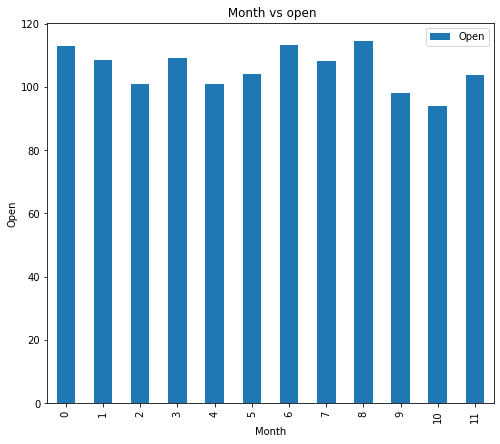

In [41]:
# Chart - 1 visualization code
month_vs_open.plot(kind = 'bar', figsize=(8,7), title = " Month vs open", xlabel = 'Month', ylabel = 'Open' )

ValueError: ignored

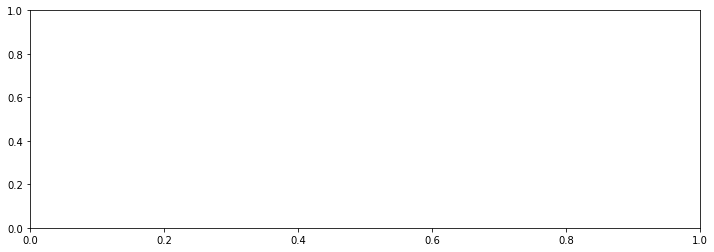

In [54]:
# chart 2 
# lineplot for month_vs_high
fig,ax=plt.subplots(figsize=(12,4))
sns.lineplot(x = 'Month',y = 'High', date = month_vs_high)

In [50]:
numeric_features = bank_dataset.describe().columns
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

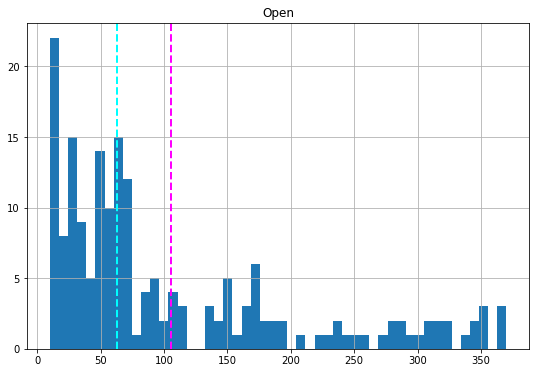

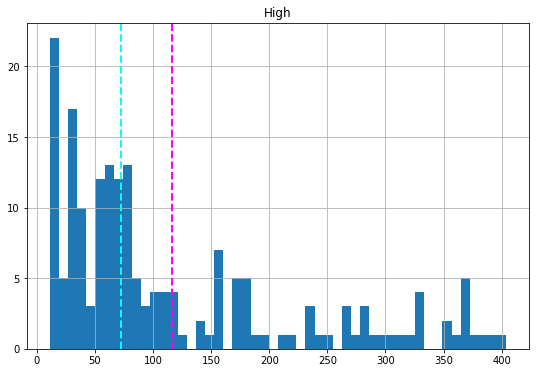

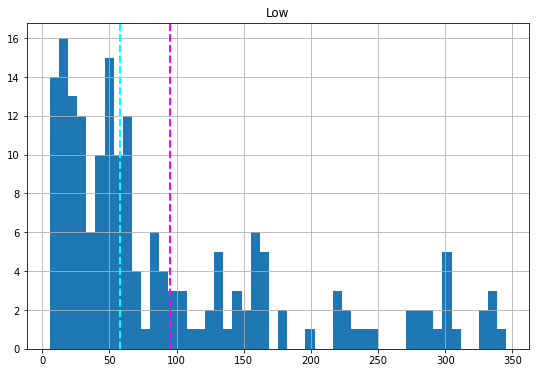

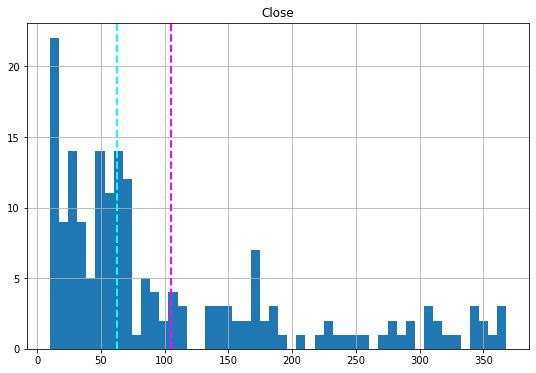

In [51]:
for col in numeric_features[0:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bank_dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***